# Loading Data

In [1381]:
import pandas as pd
import numpy as np
import random

In [1382]:
!pip3 install ucimlrepo

In [1383]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# Data Visualization
Identifying trends between features in our dataset and how they relate to the label

In [1384]:
X.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [1385]:
y[:15]

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1


In [1386]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Count'>

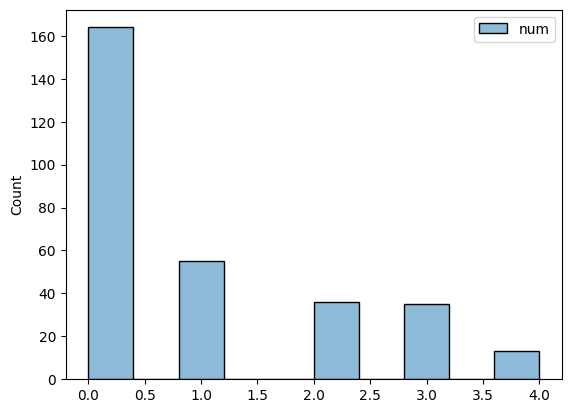

In [1387]:
sns.histplot(y)

<Axes: xlabel='age', ylabel='Count'>

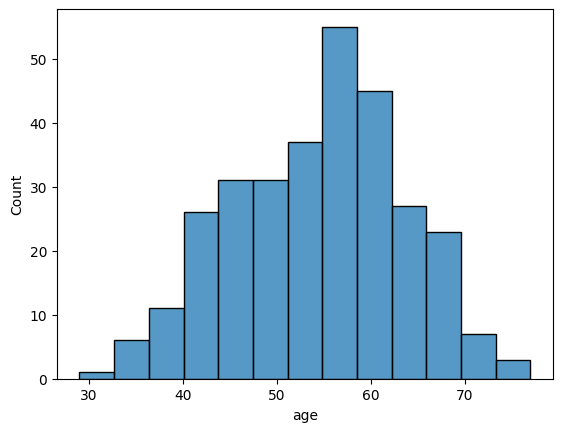

In [1388]:
sns.histplot(X['age'])

<Axes: xlabel='sex', ylabel='Count'>

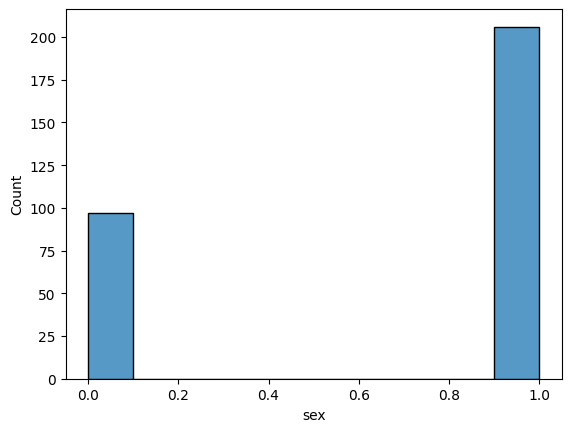

In [1389]:
sns.histplot(X['sex'])

<Axes: ylabel='Count'>

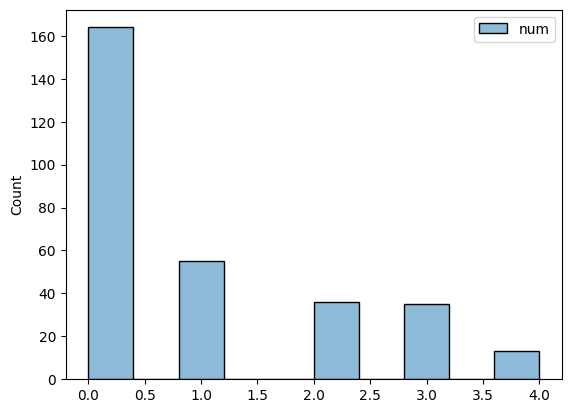

In [1390]:
sns.histplot(y)

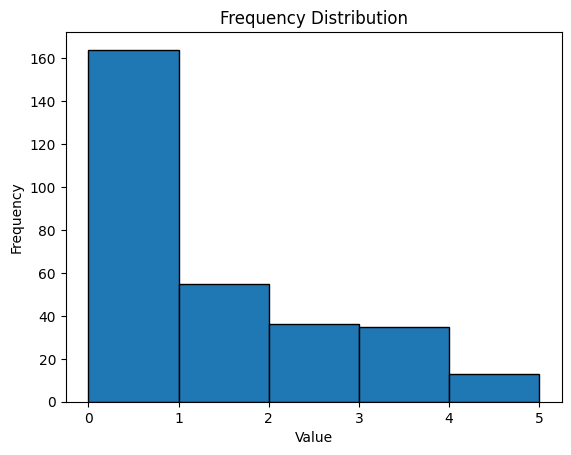

In [1391]:
plt.hist(y, bins=range(0, 6), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

In [1392]:
X['label'] = y

In [1393]:
#sns.catplot(data=X, x=X['sex'], hue='label', kind='swarm')

<Axes: xlabel='age', ylabel='Count'>

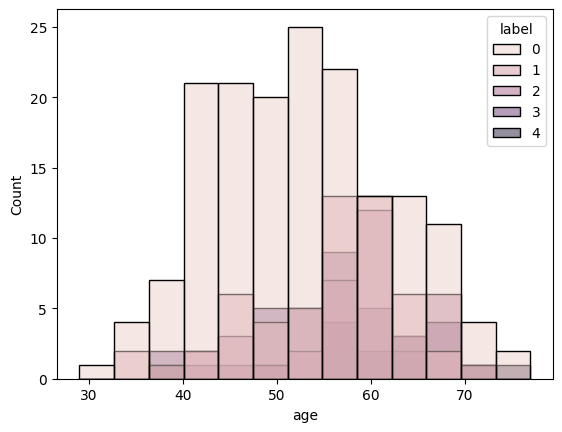

In [1394]:
sns.histplot(data=X, x=X['age'],hue='label')

In [1395]:
#sns.catplot(data=X, x=X['fbs'],hue='label',kind="swarm")

In [1396]:
X.groupby(['fbs', 'label']).count()

age  sex   cp  trestbps  chol  restecg  thalach  exang  oldpeak  \
fbs label                                                                    
0   0      141  141  141       141   141      141      141    141      141   
    1       51   51   51        51    51       51       51     51       51   
    2       27   27   27        27    27       27       27     27       27   
    3       27   27   27        27    27       27       27     27       27   
    4       12   12   12        12    12       12       12     12       12   
1   0       23   23   23        23    23       23       23     23       23   
    1        4    4    4         4     4        4        4      4        4   
    2        9    9    9         9     9        9        9      9        9   
    3        8    8    8         8     8        8        8      8        8   
    4        1    1    1         1     1        1        1      1        1   

           slope   ca  thal  
fbs label                    
0   0        141  138   140  
    1         51   51    51  
    2         27   27    27  
    3         27   27    27  
    4         12   12    12  
1   0         23   23    23  
    1          4    3     4  
    2          9    9     8  
    3          8    8     8  
    4          1    1     1

In [1397]:
#sns.catplot(data=X, x=X['restecg'],hue='label',kind='swarm')

In [1398]:
X.groupby(['restecg','label']).count()

age  sex  cp  trestbps  chol  fbs  thalach  exang  oldpeak  \
restecg label                                                               
0       0       95   95  95        95    95   95       95     95       95   
        1       23   23  23        23    23   23       23     23       23   
        2       19   19  19        19    19   19       19     19       19   
        3       12   12  12        12    12   12       12     12       12   
        4        2    2   2         2     2    2        2      2        2   
1       0        1    1   1         1     1    1        1      1        1   
        2        1    1   1         1     1    1        1      1        1   
        3        1    1   1         1     1    1        1      1        1   
        4        1    1   1         1     1    1        1      1        1   
2       0       68   68  68        68    68   68       68     68       68   
        1       32   32  32        32    32   32       32     32       32   
        2       16   16  16        16    16   16       16     16       16   
        3       22   22  22        22    22   22       22     22       22   
        4       10   10  10        10    10   10       10     10       10   

               slope  ca  thal  
restecg label                   
0       0         95  92    95  
        1         23  23    23  
        2         19  19    18  
        3         12  12    12  
        4          2   2     2  
1       0          1   1     1  
        2          1   1     1  
        3          1   1     1  
        4          1   1     1  
2       0         68  68    67  
        1         32  31    32  
        2         16  16    16  
        3         22  22    22  
        4         10  10    10

<Axes: xlabel='thalach', ylabel='Count'>

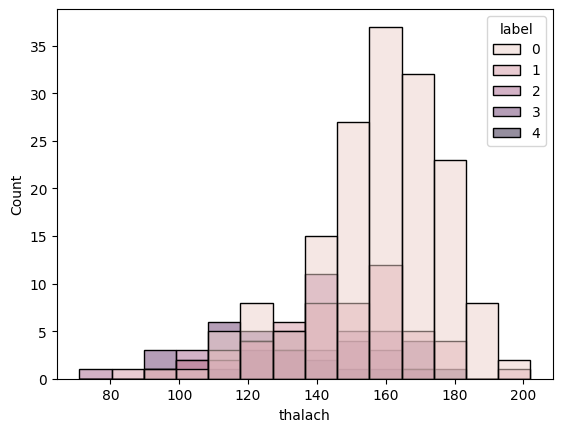

In [1399]:
sns.histplot(data=X,x=X['thalach'],hue='label') #maximum heart rate

<Axes: xlabel='trestbps', ylabel='Count'>

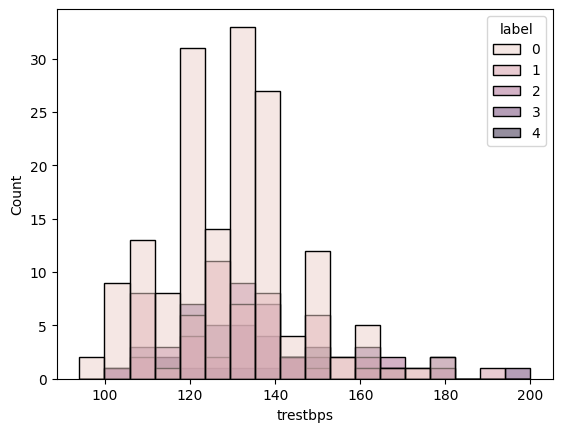

In [1400]:
sns.histplot(data=X,x=X['trestbps'],hue='label') #blood pressure

# Preprocessing: Identifying Missing Values

Here, we attempt to address the missing values in the dataset.

In [1408]:
X['ca'].isnull().sum().sum()

np.int64(4)

In [1409]:
X['thal'].isnull().sum().sum()

np.int64(2)

In [1410]:
X['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [1411]:
X['thal'].unique()

array([ 6.,  3.,  7., nan])

In [1412]:
df = X

In [1413]:
len(df)

303

In [1414]:
X.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Preprocessing: KNN 1 - ca
KNN Model with K=1

Now, we will be preprocessing our data by using a K-Nearest-Neighbors (KNN) approach. We'll make two of them: one for ca and one for thal.

In [1415]:
df_ca = df.drop('thal', axis=1)

In [1416]:
df_thal = df.drop('ca', axis=1)

In [1417]:
from sklearn.model_selection import train_test_split

In [1418]:
missing_values_mask_ca = df_ca.isnull().any(axis=1)

df_missing = df_ca[missing_values_mask_ca]
df_no_missing = df_ca[~missing_values_mask_ca]
xtrain, ytrain, xtest, ytest = df_no_missing.drop('ca',axis=1), df_no_missing['ca'], df_missing.drop('ca',axis=1), df_missing['ca']
xtrain, xvalidation, ytrain, yvalidation = train_test_split(xtrain, ytrain, test_size=0.1, random_state=42)

In [1419]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [1420]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)
  predictions = knn.predict(xvalidation)
  # Print the score on the testing data
  print("KNN Testing Set Accuracy:")
  print(accuracy_score(yvalidation, predictions)*100)
  print(knn.predict(xtest))

KNN Testing Set Accuracy:
56.666666666666664
[2. 0. 1. 0.]
KNN Testing Set Accuracy:
53.333333333333336
[0. 0. 1. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
70.0
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 0. 0.]
KNN Testing Set Acc

In [1421]:
df.loc[166, 'ca'] = 0
df.loc[192, 'ca'] = 0
df.loc[287, 'ca'] = 2
df.loc[302, 'ca'] = 0

# Preprocessing: KNN 2 - thal
KNN Model with K=1

In [1422]:
missing_values_mask_thal = df_thal.isnull().any(axis=1)

df_missing = df_thal[missing_values_mask_thal]
df_no_missing = df_thal[~missing_values_mask_thal]
xtrain, ytrain, xtest, ytest = df_no_missing.drop('thal',axis=1), df_no_missing['thal'], df_missing.drop('thal',axis=1), df_missing['thal']
xtrain, xvalidation, ytrain, yvalidation = train_test_split(xtrain, ytrain, test_size=0.1)

In [1423]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
87,53,0,3,128,216,0,2,115,0,0.0,1,0
266,52,1,4,128,204,1,0,156,1,1.0,2,2


Regression would be better in this case because of the 3-6-7 split in classes, with 6 and 7 being more extreme

In [1424]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)
  predictions = knn.predict(xvalidation)
  # Print the score on the testing data
  print("KNN Testing Set Accuracy:")
  print(accuracy_score(yvalidation, predictions)*100)
  print(knn.predict(xtest))

KNN Testing Set Accuracy:
61.29032258064516
[3. 3.]
KNN Testing Set Accuracy:
61.29032258064516
[3. 3.]
KNN Testing Set Accuracy:
61.29032258064516
[7. 3.]
KNN Testing Set Accuracy:
61.29032258064516
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
58.06451612903226
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
61.29032258064516
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
58.06451612903226
[7. 3.]
KNN Testing Set Accuracy:
48.38709677419355
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
58.06451612903226
[7. 3.]
KNN Testing Set Accuracy:
61.29032258064516
[7. 3.]
KNN Testing Set Accuracy:
58.06451612903226
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing 

In [1425]:
df.loc[87, 'thal'] = 7
df.loc[266, 'thal'] = 3

# Preprocessing: Normalization

In [1426]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [1427]:
df['cp']/=4

In [1428]:
df['trestbps'] = (df['trestbps'] - df['trestbps'].mean(axis=0))/df['trestbps'].std()

In [1429]:
df['chol'] = (df['chol'] - df['chol'].mean(axis=0))/df['chol'].std()

In [1430]:
df['restecg']/=2

In [1431]:
df['thalach'] = (df['thalach'] - df['thalach'].mean(axis=0))/df['thalach'].std()

In [1432]:
df['oldpeak'] = (df['oldpeak'] - df['oldpeak'].mean(axis=0))/df['oldpeak'].std()

In [1433]:
df['ca']/=3

In [1434]:
df['thal']/=7

In [1435]:
df['age'] = (df['age'] - df['age'].mean(axis=0))/df['age'].std()

In [1436]:
df['slope']/=3

In [1437]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0


# Resampling Code: Before Train-Test-Split using SMOTE (multi-class)

In [1438]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, y = df.drop('label',axis=1), df['label']
X_res, y_res = sm.fit_resample(X, y.ravel())

/var/folders/rn/ry_5bfb11bvcnryvb2p6pfrr0000gn/T/ipykernel_5659/4284888615.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_res, y_res = sm.fit_resample(X, y.ravel())


In [1439]:
df_upsampled_multi = X_res
df_upsampled_multi['label'] = y_res
df_upsampled_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0


In [1440]:
X_res.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
815    False
816    False
817    False
818    False
819    False
Length: 820, dtype: bool

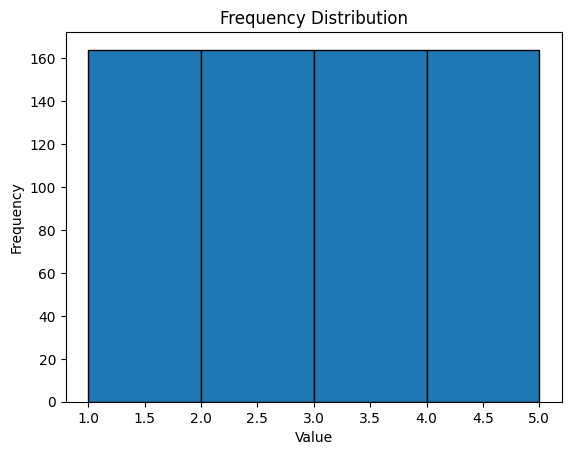

In [1441]:
plt.hist(y_res, bins=range(1, 6), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

# Aggregate Data

In [1088]:
confusion_lr = np.array([])
confusion_rf = np.array([])
confusion_knn = np.array([])
confusion_mlp = np.array([])
confusion_svc = np.array([])
confusion_dt = np.array([])
confusion_custom = np.array([])

# Train Test Split Code: After Resampling (MULTI-CLASS)

In [1442]:
from sklearn.model_selection import KFold

In [1443]:
X, y = df_upsampled_multi.drop('label',axis=1), df_upsampled_multi['label']

In [1444]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [1445]:
global X_train, X_test, y_train, y_test
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    if fold==4:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Model 1: Logistic Regression
For reference, our Pandas DataFrame is now called 'df.'

In [1093]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

In [ ]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression()

In [1095]:
y_pred_lr = model_lr.predict(X_test)

In [1096]:
log_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {log_accuracy}")

Accuracy: 0.5975609756097561


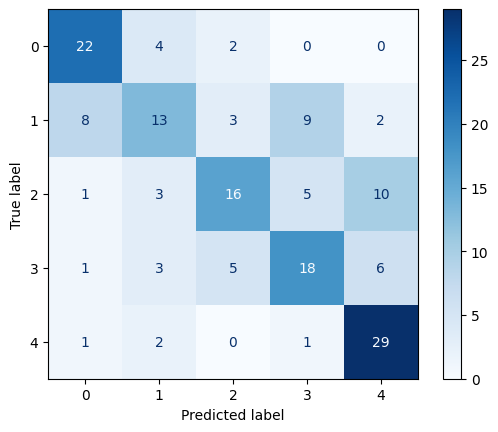

In [1097]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model_lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1098]:
cm_lr

array([[22,  4,  2,  0,  0],
       [ 8, 13,  3,  9,  2],
       [ 1,  3, 16,  5, 10],
       [ 1,  3,  5, 18,  6],
       [ 1,  2,  0,  1, 29]])

Other models to implement:

Classification - Logistic Regression, K-Nearest-Neighbors, MLP, Random Forest Classifier

Regression - Linear Regression, Random Forest Regressor

In [1099]:
model_lr.coef_[0]

array([-0.07954234, -0.84613995, -2.06603796, -0.28445553, -0.11353828,
        0.71398277, -0.66605856,  0.40788181, -0.24779592, -0.57080196,
       -1.09389728, -2.95445626, -2.2097621 ])

In [1100]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_lr, average='macro')
recall = recall_score(y_test, y_pred_lr, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")


Precision for Zero vs Non-Zero: 0.5929054208203144
Recall for Zero vs Non-Zero: 0.6077056277056277


In [1101]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_lr.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.836858746088691


<Axes: ylabel='Feature'>

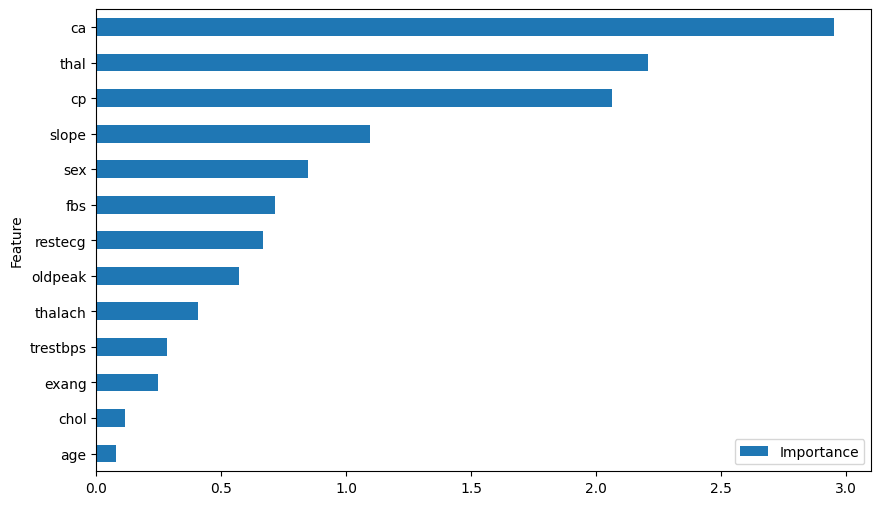

In [1102]:
coefficients = model_lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) #The weights used in the model by the logistic model

In [1103]:
if len(confusion_lr)==0:
    confusion_lr = cm_lr
else:
    confusion_lr+=cm_lr

# Model 2: Random Forest Classifier

In [1446]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=128, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score: {rf_accuracy}, N estimators: {128}")

Accuracy score: 0.8963414634146342, N estimators: 128


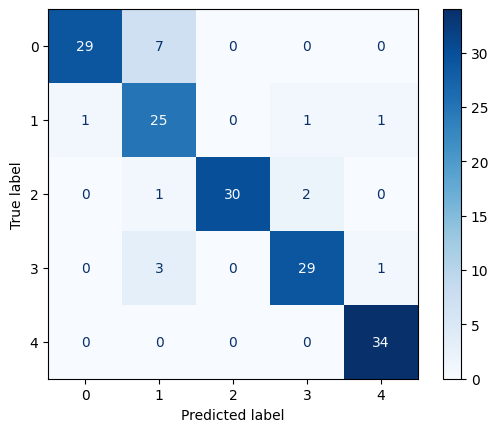

In [1448]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1449]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.9023611111111111
Recall for Zero vs Non-Zero: 0.8972582972582973


<Axes: >

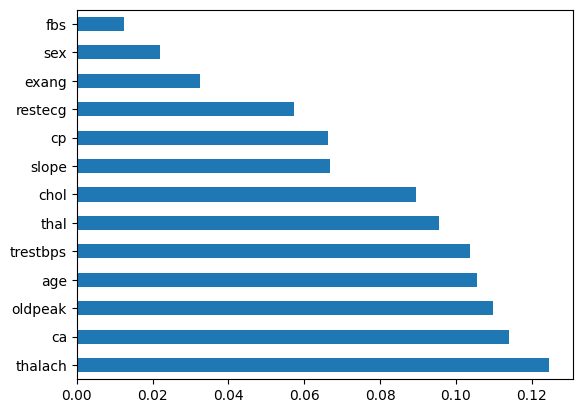

In [1450]:
(pd.Series(model_rf.feature_importances_, index=X_train.columns)
   .nlargest(13)
   .plot(kind='barh'))

In [1451]:
for name, importance in zip(X_train, model_rf.feature_importances_):
    print(name,importance)

age 0.10565458140030028
sex 0.021900026264706093
cp 0.06620224848203701
trestbps 0.10367661842669157
chol 0.08947299444716092
fbs 0.012364498937496863
restecg 0.057399225256844
thalach 0.12456064938606874
exang 0.032498555361167476
oldpeak 0.10983223521304973
slope 0.0667402659713228
ca 0.11406989326266968
thal 0.09562820759048468


In [1452]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_rf.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.9821894961823432


In [1453]:
if len(confusion_rf)==0:
    confusion_rf = cm_rf
else:
    confusion_rf+=cm_rf

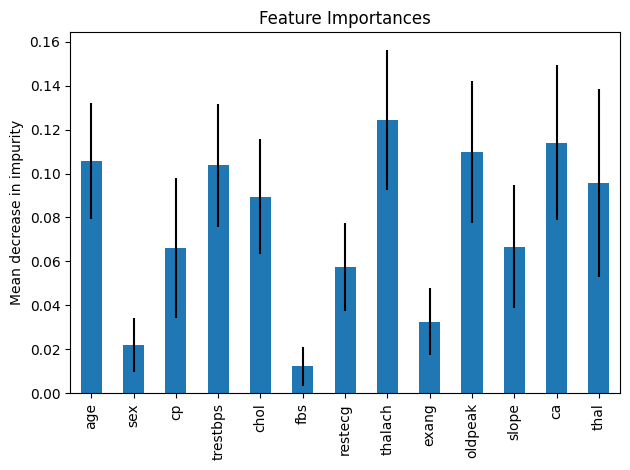

In [1454]:
feature_names = [f"{feature}" for i,feature in enumerate(X_train.columns)]
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Model 3: K-Nearest-Neighbors (KNN) Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy score: {knn_accuracy}, K: {1}")

Accuracy score: 0.8841463414634146, K: 1


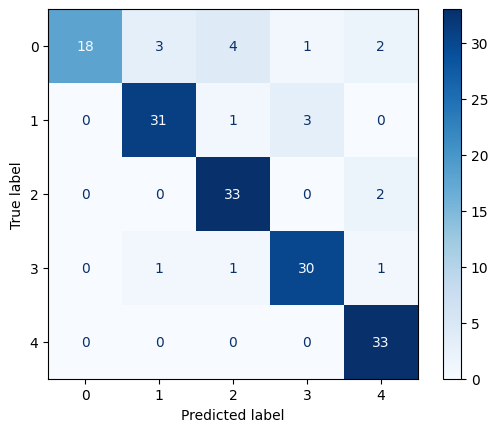

In [1113]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1114]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.8965284251352363
Recall for Zero vs Non-Zero: 0.8761038961038962


In [1115]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_knn.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.9234297810598182


In [1116]:
if len(confusion_knn)==0:
    confusion_knn = cm_knn
else:
    confusion_knn+=cm_knn

# Model 4: Multilayer Perceptron (MLP) Classifier

In [1117]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model_mlp = MLPClassifier(random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy score: {mlp_accuracy}")

Accuracy score: 0.8109756097560976


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


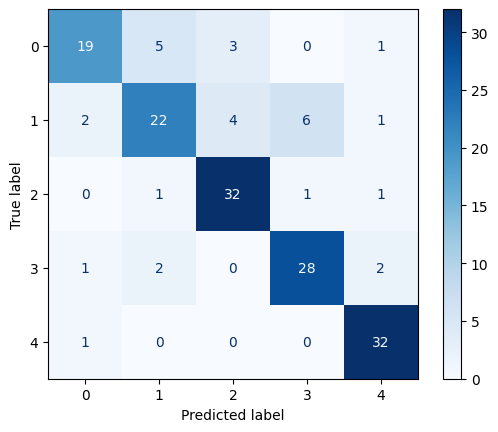

In [1119]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=model_mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1120]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_mlp, average='macro')
recall = recall_score(y_test, y_pred_mlp, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.8089595950465516
Recall for Zero vs Non-Zero: 0.8079220779220779


In [1121]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_mlp.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.954515043166856


In [1122]:
if len(confusion_mlp)==0:
    confusion_mlp = cm_mlp
else:
    confusion_mlp+=cm_mlp

# Model 5: Support Vector Machines (SVM) Classifier

In [1123]:
from sklearn.svm import SVC

In [1124]:
model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy score: {svc_accuracy}")

Accuracy score: 0.7439024390243902


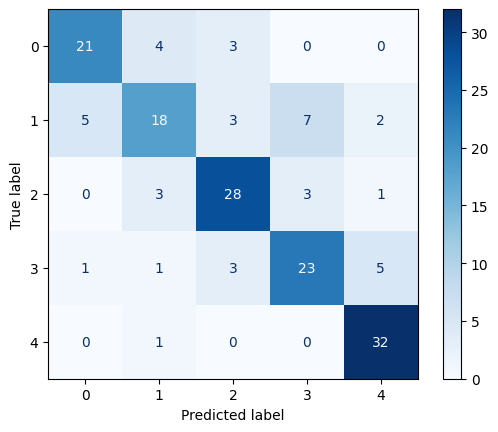

In [1125]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=model_svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1126]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_svc, average='macro')
recall = recall_score(y_test, y_pred_svc, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.7396341796341795
Recall for Zero vs Non-Zero: 0.7461904761904762


In [1127]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_scores = model_svc.decision_function(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.9298255412747221


In [1128]:
if len(confusion_svc)==0:
    confusion_svc = cm_svc
else:
    confusion_svc+=cm_svc

# Model 6: Decision Tree Classifier

In [1129]:
from sklearn.tree import DecisionTreeClassifier

In [1130]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy score: {dt_accuracy}")

Accuracy score: 0.75


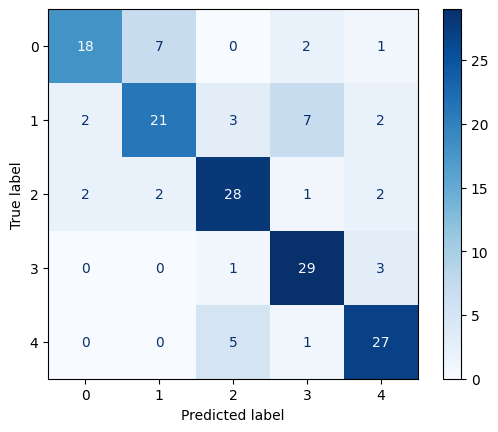

In [1131]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1132]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_dt, average='macro')
recall = recall_score(y_test, y_pred_dt, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.7542734292734292
Recall for Zero vs Non-Zero: 0.7479653679653679


In [1133]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_dt.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.8425842023461095


In [1134]:
if len(confusion_dt)==0:
    confusion_dt = cm_dt
else:
    confusion_dt+=cm_dt

# Custom TensorFlow Model - Multi-class Classification

In [1135]:
from keras.models import Sequential, load_model
from keras.layers import Dense, InputLayer, Activation, Conv2D, MaxPooling2D, Add
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.losses import SparseCategoricalCrossentropy
import keras

In [1136]:
X_trainc, X_val, y_trainc, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

In [1137]:
X.shape

(820, 13)

In [1138]:
from keras.callbacks import ModelCheckpoint, Callback

In [1139]:
class SaveBestModel(Callback):
  def __init__(self, save_path):
    super(SaveBestModel, self).__init__()
    self.save_path = save_path
    self.best_acc_sum = -np.inf
    self.best_epoch = -1
  def on_epoch_end(self, epoch, logs=None):
    current_val_accuracy = logs.get('val_accuracy')
    current_accuracy = logs.get('accuracy')
    if current_val_accuracy+current_accuracy>=self.best_acc_sum and epoch>20 and current_accuracy!=1:
      self.best_acc_sum = current_val_accuracy+current_accuracy
      self.best_epoch = epoch
      self.model.save(self.save_path)
      print(f"\nEpoch {epoch+1}: val_accuracy improved to {current_val_accuracy}, saving model to {self.save_path}")

In [1140]:
callbacks_list = [
      #ModelCheckpoint(filepath='checkpoint_path_multi.keras', monitor='val_loss', save_best_only=True),
      SaveBestModel(save_path='checkpoint_custom_callback.keras')
]

In [1141]:
from keras import Input, Model

In [1142]:
inLayer = Input(shape=(13,))
x = Dense(1024, activation='relu')(inLayer)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(13, activation='relu')(x)
skip = Add()([inLayer, x])
x = Dense(512, activation='relu')(skip)
x = Dense(512, activation='relu')(x)
x = Dense(13, activation='relu')(x)
skip = Add()([inLayer, x])
x = Dense(512, activation='relu')(skip)
outLayer = Dense(5, activation='softmax')(x)
model = Model(inputs=inLayer, outputs=outLayer)

In [1143]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 13)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 1024)      │     14,336 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 512)       │    524,800 │ dense_63[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 512)       │    262,656 │ dense_64[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 13)        │      6,669 │ dense_65[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 13)        │          0 │ input_layer_7[0]… │
│                     │                   │            │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 512)       │      7,168 │ add_14[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 512)       │    262,656 │ dense_67[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 13)        │      6,669 │ dense_68[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 13)        │          0 │ input_layer_7[0]… │
│                     │                   │            │ dense_69[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 512)       │      7,168 │ add_15[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 5)         │      2,565 │ dense_70[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,094,687 (4.18 MB)

 Trainable params: 1,094,687 (4.18 MB)

 Non-trainable params: 0 (0.00 B)

In [1144]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [1145]:
history = model.fit(x=X_trainc, y=y_trainc, batch_size=16, epochs=400, shuffle=True, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks_list)

Epoch 1/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1824 - loss: 1.6299 - val_accuracy: 0.1515 - val_loss: 1.6633
Epoch 2/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1563 - loss: 1.6245 - val_accuracy: 0.1515 - val_loss: 1.6544
Epoch 3/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2263 - loss: 1.6080 - val_accuracy: 0.1515 - val_loss: 1.6466
Epoch 4/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2277 - loss: 1.6045 - val_accuracy: 0.1818 - val_loss: 1.6374
Epoch 5/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2583 - loss: 1.5958 - val_accuracy: 0.1515 - val_loss: 1.6284
Epoch 6/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2608 - loss: 1.5856 - val_accuracy: 0.1515 - val_loss: 1.6193
Epoch 7/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2403 - loss: 1.5825 - val_accuracy: 0.1212 - val_loss: 1.6085
Epoch 8/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3041 - loss: 1.5681 - val_accuracy: 0.1212 - v

In [1146]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.2, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()
    print(f"The best epoch is: {best_epoch+1}")

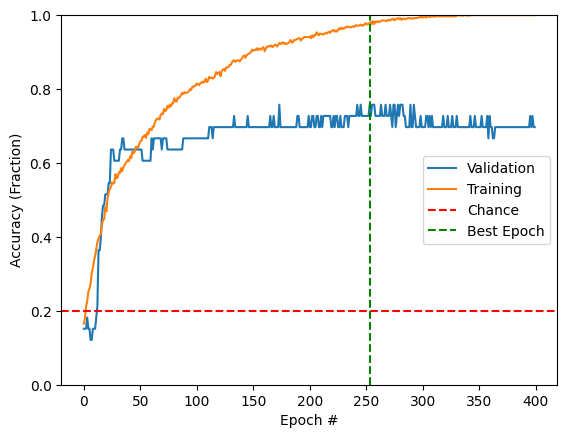

The best epoch is: 254.0


In [1147]:
plot_acc(history)

In [1148]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8220 - loss: 1.6595


[1.1570885181427002, 0.8658536672592163]

In [1149]:
cp_model = load_model("checkpoint_custom_callback.keras")

In [1150]:
cp_model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 1.8181 


[1.2942379713058472, 0.8536585569381714]

In [1151]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


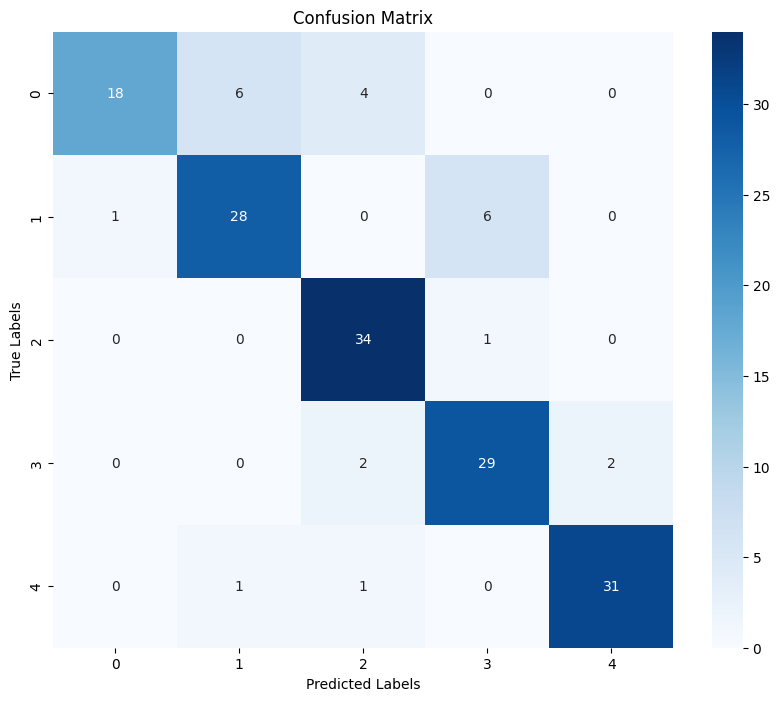

In [1152]:
y_pred_probs = cp_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in sparse format (not one-hot encoded)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [1153]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.8643172417370106
Recall for Zero vs Non-Zero: 0.8464935064935066


In [1154]:
y_test_binarized.shape

(164, 5)

In [1155]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model.predict(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Macro-Average AUC: 0.9579983266647201


In [1156]:
if len(confusion_custom)==0:
    confusion_custom = conf_matrix
else:
    confusion_custom+=conf_matrix

# Wearable Tech Implementation

In [1455]:
df_wearable = df_upsampled_multi.copy()
df_wearable

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.000000,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.000000,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.000000,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.000000,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.000000,0.978917,0,0.310399,0.333333,0.000000,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.728225,1,1.00,1.239865,-0.037187,0,1.000000,-0.918544,0,0.460644,0.666667,0.808518,0.917936,4
816,1.491315,0,1.00,0.874546,-0.993900,0,0.416313,-1.275921,0,0.770230,0.861229,0.416313,1.000000,4
817,0.873497,0,1.00,0.767986,2.867212,0,0.933418,0.110534,0,2.595578,0.711054,1.000000,0.980977,4
818,0.875771,0,1.00,1.322183,-0.010256,0,1.000000,-1.412052,0,-0.034110,0.666667,1.000000,1.000000,4


In [1456]:
df_wearable = df_wearable.drop("ca",axis=1)

In [1457]:
df_wearable = df_wearable.drop("thal",axis=1)

In [1458]:
df_wearable = df_wearable.drop("slope",axis=1)

In [1459]:
df_wearable = df_wearable.drop("fbs",axis=1)

In [1460]:
df_wearable = df_wearable.drop("chol",axis=1)

In [1461]:
df_wearable = df_wearable.drop("exang",axis=1)

In [1462]:
df_wearable = df_wearable.drop("oldpeak",axis=1)

In [1463]:
df_wearable

,age,sex,cp,trestbps,restecg,thalach,label
0,0.947160,1,0.25,0.756274,1.000000,0.017169,0
1,1.389703,1,1.00,1.608559,1.000000,-1.818896,2
2,1.389703,1,1.00,-0.664201,1.000000,-0.900864,1
3,-1.929372,1,0.75,-0.096011,0.000000,1.634655,0
4,-1.486829,0,0.50,-0.096011,1.000000,0.978917,0
...,...,...,...,...,...,...,...
815,0.728225,1,1.00,1.239865,1.000000,-0.918544,4
816,1.491315,0,1.00,0.874546,0.416313,-1.275921,4
817,0.873497,0,1.00,0.767986,0.933418,0.110534,4
818,0.875771,0,1.00,1.322183,1.000000,-1.412052,4


In [1464]:
rf_wearable = RandomForestClassifier(n_estimators=128, random_state=42)

In [1465]:
X_wearable, y_wearable = df_wearable.drop("label",axis=1), df_wearable["label"]

In [1466]:
X_train, X_test, y_train, y_test = train_test_split(X_wearable, y_wearable, test_size=0.2)#, random_state=42)

In [1467]:
rf_wearable = RandomForestClassifier(n_estimators=i)
rf_wearable.fit(X_train, y_train)
y_pred = rf_wearable.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {rf_accuracy}, N estimators: {128}")

Accuracy score: 0.6951219512195121, N estimators: 128


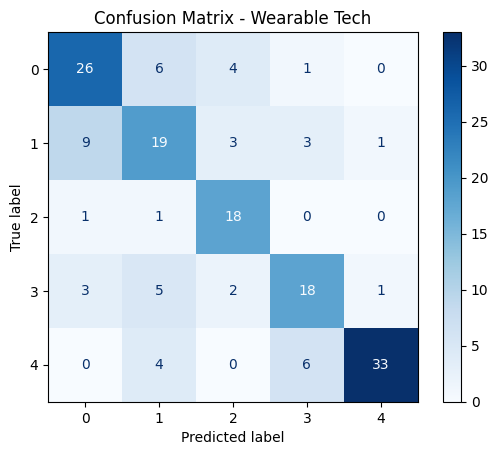

In [1468]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_wearable.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Wearable Tech")
plt.show()

In [1469]:
feature_importances = rf_wearable.feature_importances_

In [1470]:
feature_names = [f"{feature}" for i,feature in enumerate(X_wearable.columns)]

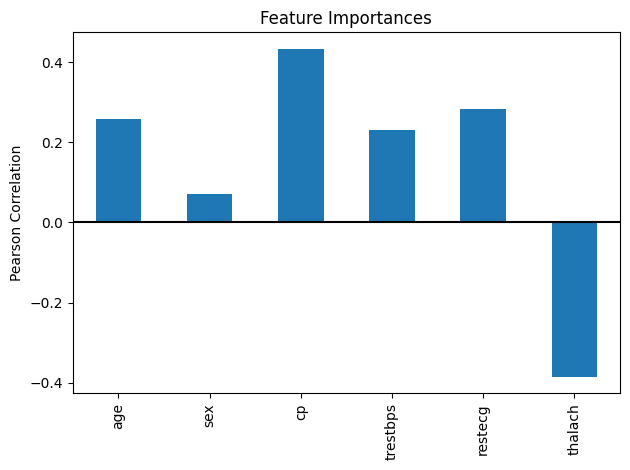

In [1477]:
feature_names = [f"{feature}" for i,feature in enumerate(X_wearable.columns)]
importances = [0.2575, 0.0706, 0.4341, 0.2308, 0.2846, -0.3857]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, label='Baseline (y=0)')
ax.set_title("Feature Importances")
ax.set_ylabel("Pearson Correlation")
fig.tight_layout()

In [1472]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.6923809523809524
Recall for Zero vs Non-Zero: 0.7067382722394752


In [1473]:
df_wearable.to_csv("wearable.csv",index=False)

# Aggregate Confusion Matrices

In [1172]:
cm_lst = [confusion_lr,
confusion_rf,
confusion_knn,
confusion_mlp,
confusion_svc,
confusion_dt,
confusion_custom]

In [1173]:
cm_lst

[array([[22,  4,  2,  0,  0],
        [ 8, 13,  3,  9,  2],
        [ 1,  3, 16,  5, 10],
        [ 1,  3,  5, 18,  6],
        [ 1,  2,  0,  1, 29]]),
 array([[22,  5,  1,  0,  0],
        [ 2, 28,  2,  3,  0],
        [ 1,  0, 33,  0,  1],
        [ 0,  1,  2, 30,  0],
        [ 0,  0,  0,  0, 33]]),
 array([[18,  3,  4,  1,  2],
        [ 0, 31,  1,  3,  0],
        [ 0,  0, 33,  0,  2],
        [ 0,  1,  1, 30,  1],
        [ 0,  0,  0,  0, 33]]),
 array([[19,  5,  3,  0,  1],
        [ 2, 22,  4,  6,  1],
        [ 0,  1, 32,  1,  1],
        [ 1,  2,  0, 28,  2],
        [ 1,  0,  0,  0, 32]]),
 array([[21,  4,  3,  0,  0],
        [ 5, 18,  3,  7,  2],
        [ 0,  3, 28,  3,  1],
        [ 1,  1,  3, 23,  5],
        [ 0,  1,  0,  0, 32]]),
 array([[18,  7,  0,  2,  1],
        [ 2, 21,  3,  7,  2],
        [ 2,  2, 28,  1,  2],
        [ 0,  0,  1, 29,  3],
        [ 0,  0,  5,  1, 27]]),
 array([[18,  6,  4,  0,  0],
        [ 1, 28,  0,  6,  0],
        [ 0,  0, 34,  1,  0]

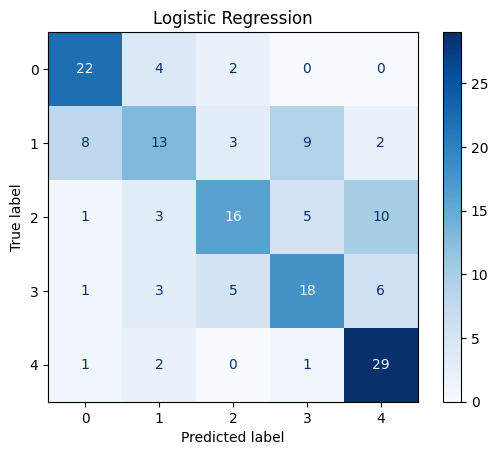

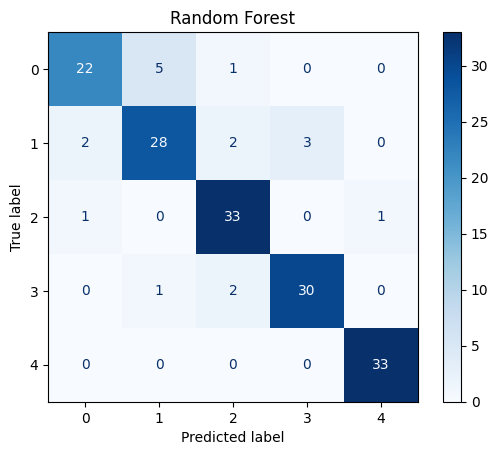

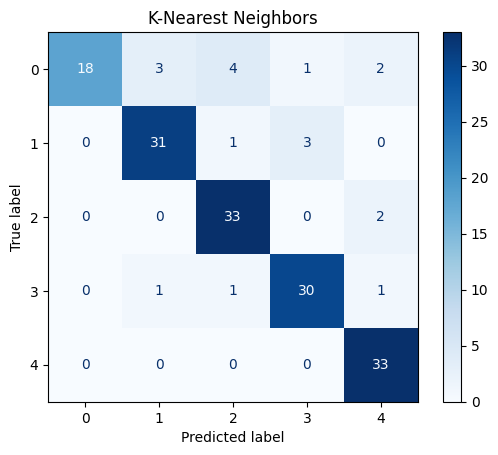

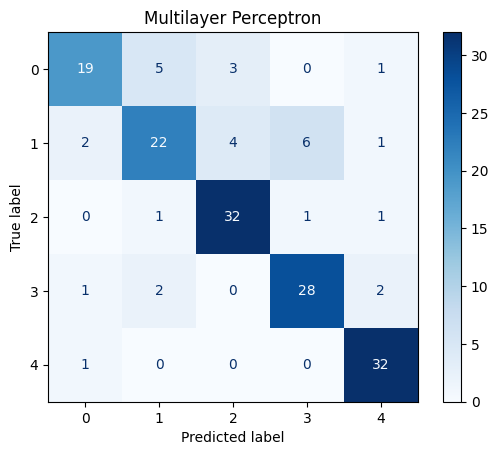

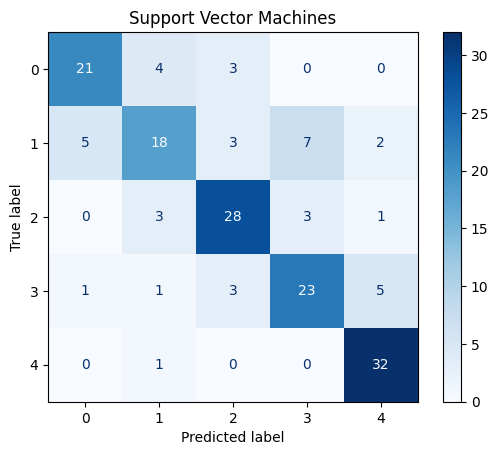

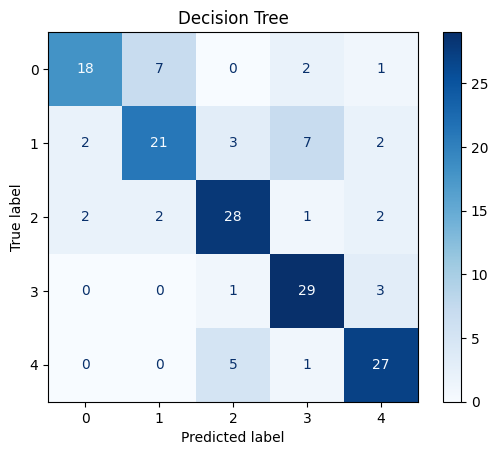

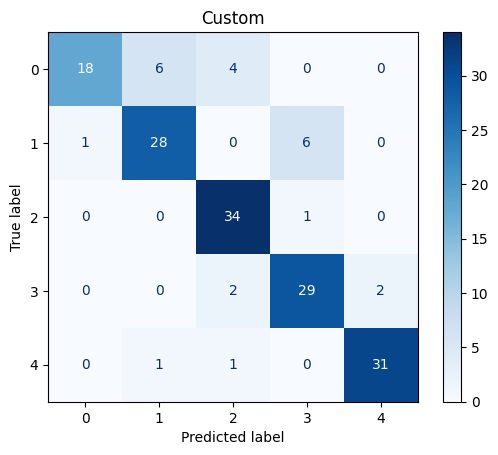

In [1174]:
names = ["Logistic Regression", "Random Forest", "K-Nearest Neighbors", "Multilayer Perceptron", "Support Vector Machines", "Decision Tree", "Custom"]
for name, cm in zip(names, cm_lst):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_wearable.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(name)
    plt.show()